# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### План проекта

1. Открыть файл с данными и изучить общую информацию
2. Подготовить данные 
  - Заменить названия столбцов (привести к нижнему регистру)
  - Преобразовать данные в нужные типы.(Описать , в каких столбцах заменили тип данных и почему )
  - Обработать пропуски при необходимости
     - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
     - Опишите причины, которые могли привести к пропускам;
     - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
   - Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.
3. Провести исследовательский анализ данных
  - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды
  - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
  - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год
  - Не учитывайте в работе данные за предыдущие годы.
  - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
  - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
  - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
  - Соотнесите выводы с продажами игр на других платформах.
  - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона
  - Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    - Поясните:
      - Как вы сформулировали нулевую и альтернативную гипотезы;
      - Какой критерий применили для проверки гипотез и почему.
6. Написать общий вывод      

### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## 1. Обзор данных (Изучение общей  информации)

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from matplotlib.pyplot import figure
from scipy import stats as st

In [2]:
data_games = pd.read_csv('C:\DataScience\Games.csv')
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# расчет доли пропущенных значений 
data_games.isna().mean() 

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Данные представлены двумя типами float и  object.

Есть пропуски данных в столбцах
 - Name
 - Year_of_Release
 - Genre
 - Critic_Score
 - User_Score
 - Rating

## 2. Предобработка данных

#### 2.1 Приведем название столбцов к нижнему регистру

In [5]:
data_games.columns=['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### 2.2 Преобразуем данные в нужные типы.

'tbd'- To Be Determined, то есть "Будет определено". То есть отсутсвие рейтинга 
заменим 'tbd' на "NaN"

In [6]:
data_games['user_score']=data_games['user_score'].replace('tbd',np.nan)

In [7]:
data_games['user_score']=data_games['user_score'].astype('float')
data_games['user_score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16715 entries, 0 to 16714
Series name: user_score
Non-Null Count  Dtype  
--------------  -----  
7590 non-null   float64
dtypes: float64(1)
memory usage: 130.7 KB


Заменим пропущенные значения в  year_of_release на 0 и удалим их



In [8]:
# замена пропусков в year_of_release на 0 
data_games['year_of_release'] = data_games['year_of_release'].fillna(value  = 0)
data_games = data_games[data_games['year_of_release'] != 0]
data_games['year_of_release'] = data_games['year_of_release'].astype(int)

####  2.2 посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
# Посчитаем суммарные продажи во всех регионах
data_games['total_sales']=sum([data_games['na_sales'],data_games['eu_sales'],data_games['jp_sales'],data_games['other_sales']])
data_games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Пропущенные данные в оценках Critic_Score ,Rating , User_Score оставим без изменений. Так как нет прямой корреляции 

## 3 Исследовательский анализ

#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [10]:
data_games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<b>Вывод</b> Данные до 1994 года можно считать не важными 

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [11]:
data_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Топ консолей : PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS,PC, XB, N64, GC, XOne

In [12]:
data_games[data_games['year_of_release']>1993].groupby('platform')['total_sales'].sum().sort_values(ascending=False)[:'XOne'].index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'XB', 'N64', 'GC', 'XOne'],
      dtype='object', name='platform')

In [13]:
data_games_top=data_games[data_games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS''PC', 'XB', 'N64', 'GC', 'XOne'])]

In [14]:
data_games_top['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'N64', 'PS', 'XB',
       'PSP', 'XOne', 'GC'], dtype=object)

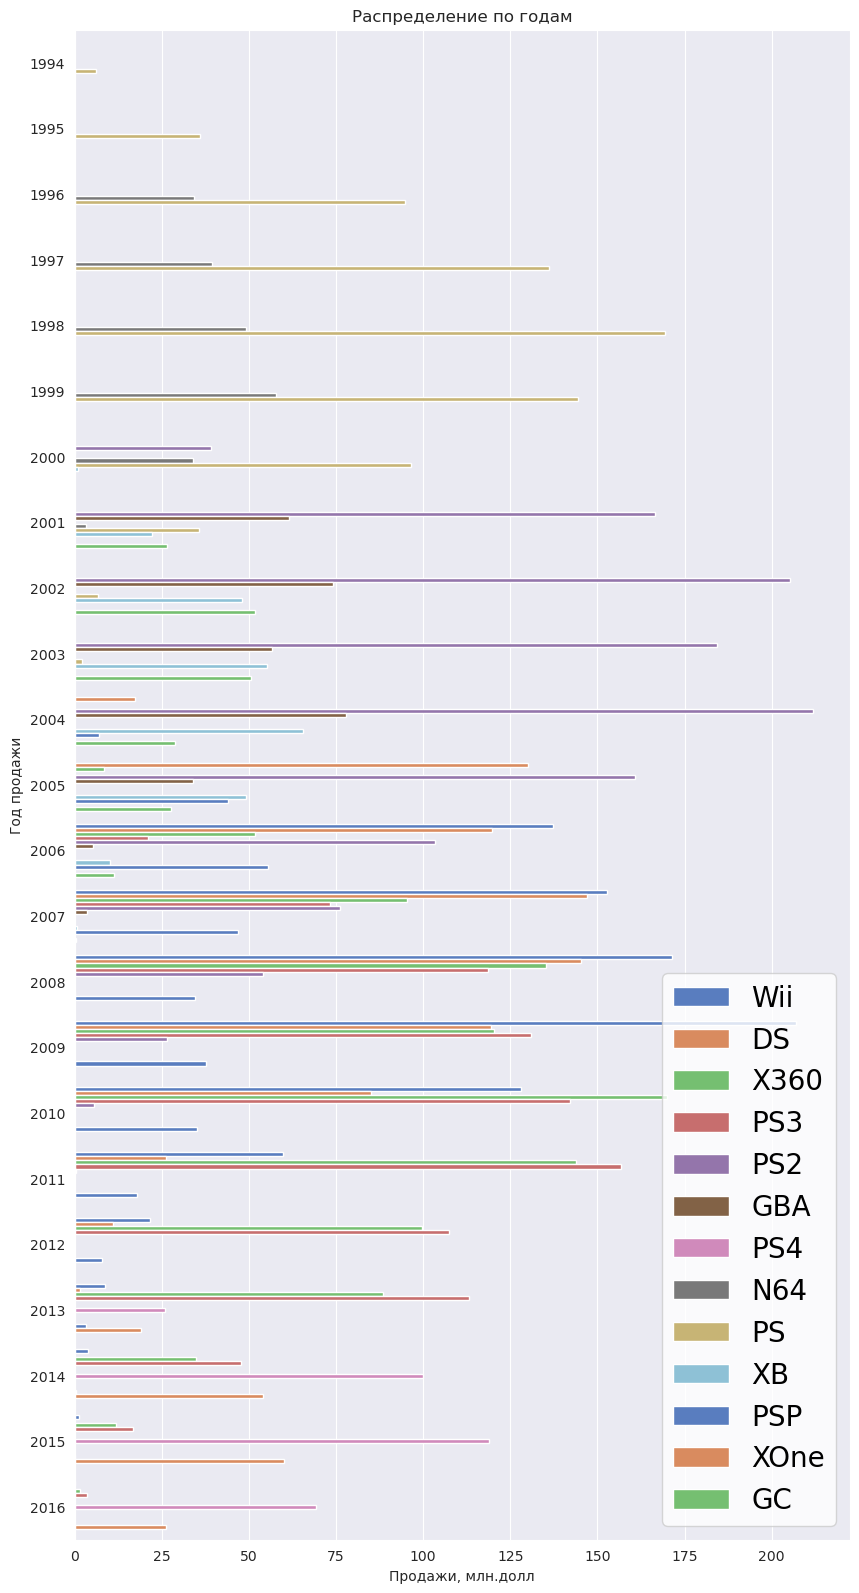

In [15]:
figure(figsize=(10,20),dpi=100)
with sns.axes_style("darkgrid"):
    (sns.barplot(x='total_sales', 
             y='year_of_release', 
             hue='platform',
             data=data_games_top[data_games_top['year_of_release']>1993],
             ci=None,orient='h',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=4,prop={'size': 20})
plt.xlabel(", млн.долл")
plt.ylabel("Год продажи")
plt.title("Распределение по годам")
plt.show()

<b> Выводы <b/>
    
    C 1994 лидером продаж являлась PS (думал, что она намного позже вышла)
    С 2001 - 2005 года - PS2
    C 2006 - 2009 года - Wii (при большой конкуренции с PS3, X360,DS )
    с 2010 - 2013 года - попеременно лидеровали PS3 и X360
    с 2014 - 2016 года - лидерство перешло к их приемникам PS4 и XONE , соответсвенно 
    Новые консоли появляются применно каждые 5-6 , плюс 2-3 года занимает "переход " от одной консоли к другой , видим это так как на графике присутствуют консоли одного производителя, например PS3 и PS4
    Примерное продолжителность актуальной жизни консоли 8-9 лет

#### 3.3 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Началом актуального периода выберем 2013 год, начало продаж PS4 и ХONE. Как продолжение яркого противостояния
Данные за 2016 год учитывать не будем так как они не полны

In [16]:
data_games_actual=data_games_top[(data_games_top['year_of_release']<2016) & (data_games_top['year_of_release']>2012)].reset_index(drop=True)

#### 3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

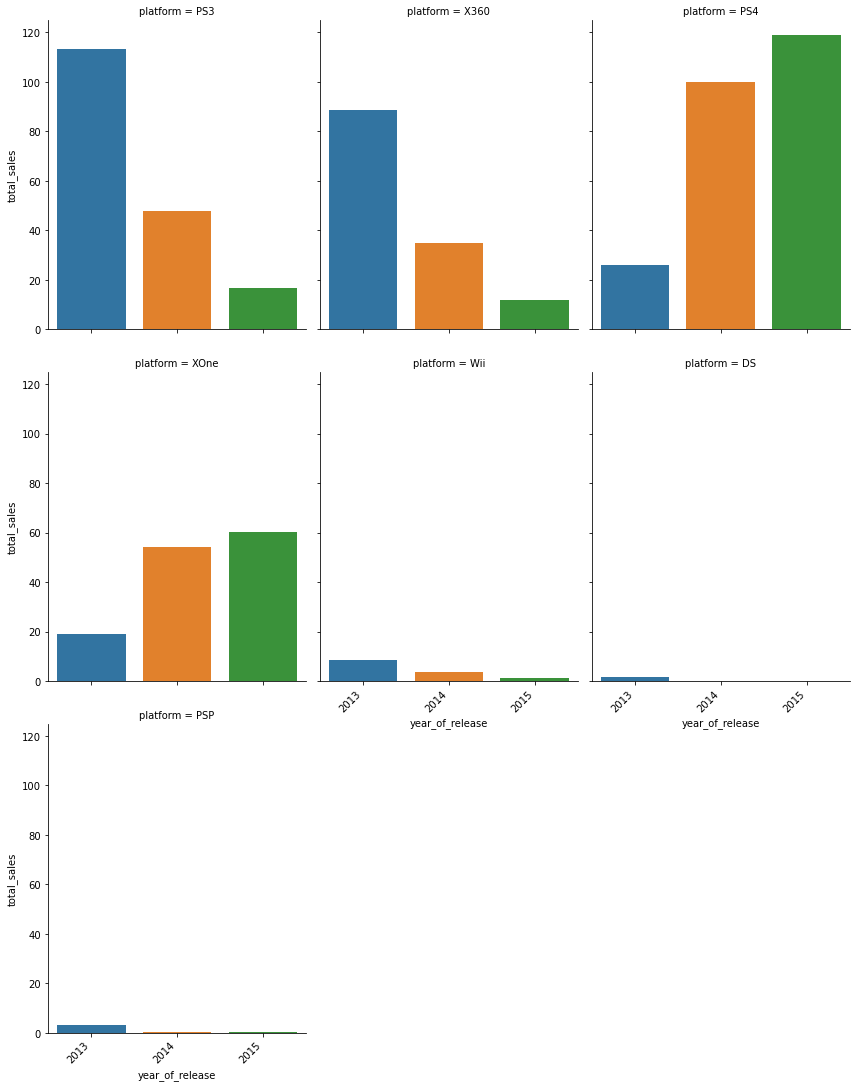

In [17]:
chart=(sns.catplot(y='total_sales',
             x='year_of_release',
             data=data_games_actual,
             col='platform',ci=None,estimator=sum,col_wrap=3, aspect=.8,
             kind='bar'))
for axes in chart.axes.flat:  
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')


Показывают рост продаж только Ps4 и XONE - их и будем считать самыми перспективными консолями

#### 3.5 Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат

In [18]:
data_group=data_games_actual.groupby('platform')['name'].count().reset_index()

In [19]:
data_group['platform']

0      DS
1     PS3
2     PS4
3     PSP
4     Wii
5    X360
6    XOne
Name: platform, dtype: object

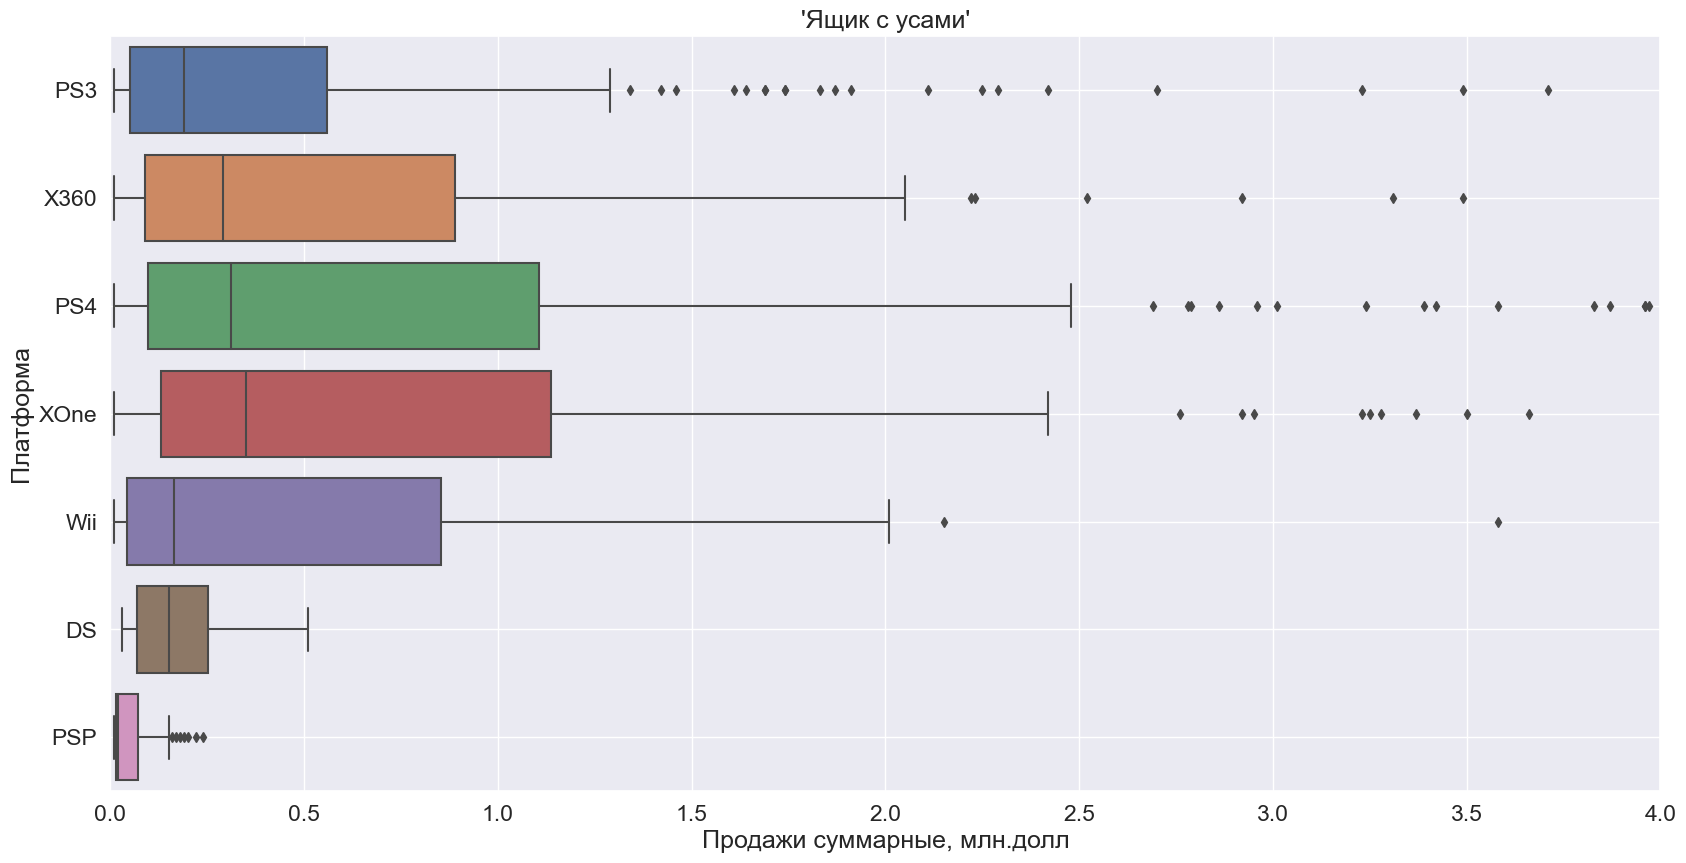

In [20]:
figure(figsize=(20,10),dpi=100)
sns.set(font_scale = 1.5)
chart=sns.boxplot(x='total_sales', 
             y='platform', 
             data=data_games_actual)
chart.grid(True)
chart.set(xlim=(0,4))
plt.xlabel("Продажи суммарные, млн.долл")
plt.ylabel("Платформа")
plt.title("'Ящик с усами'")
plt.show()

Медиана для всех консолей находиться ниже 0.5 млн 

Наибольшие продажи у новых консолей PS4 и XONE
Причем только у них граница Q3 находится за символичной отметкой в миллион долларов

Действителньо удачными являются не так много игр.

#### 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

In [21]:
data_games_actual['critic_score'].value_counts(bins=10).index

IntervalIndex([(71.8, 80.2], (80.2, 88.6], (63.4, 71.8], (55.0, 63.4], (46.6, 55.0], (88.6, 97.0], (29.8, 38.2], (38.2, 46.6], (12.915000000000001, 21.4], (21.4, 29.8]], dtype='interval[float64, right]')

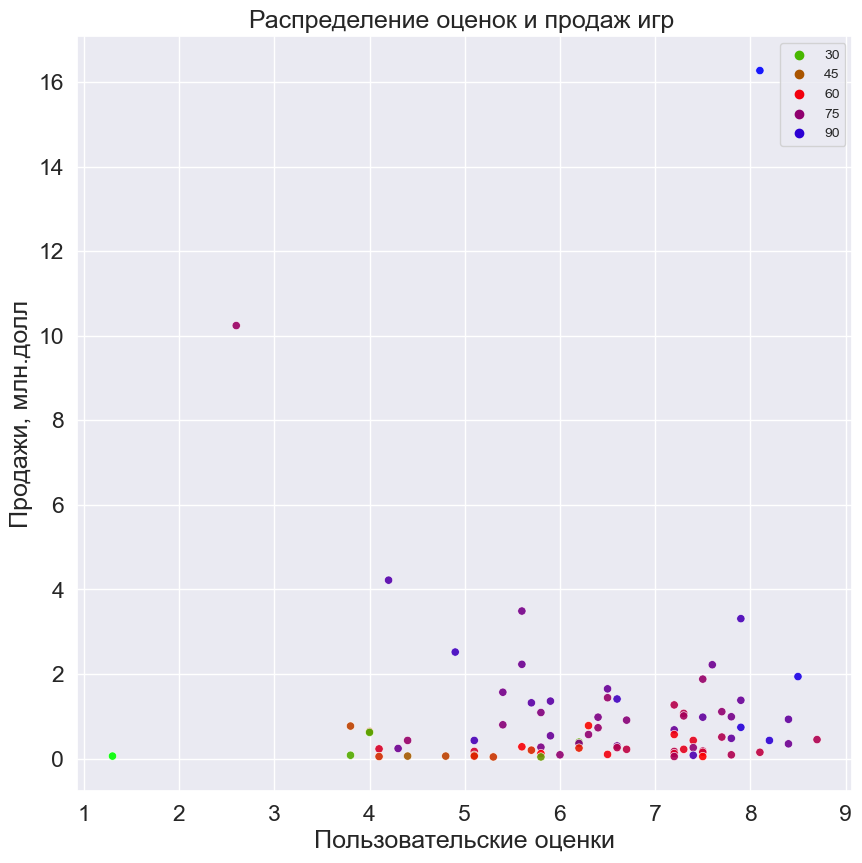

In [22]:
figure(figsize=(10,10),dpi=100)
sns.scatterplot(x='user_score', y='total_sales',data=data_games_actual[data_games_actual['platform']=='X360'],palette='brg_r',hue='critic_score',legend='brief',alpha=0.9,marker='o')
plt.legend(loc=1,prop={'size': 10})

plt.xlabel("Пользовательские оценки")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение оценок и продаж игр ")
plt.show()

In [23]:
data_games_actual.loc[:,['total_sales','user_score','critic_score']].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.001222,0.376770
user_score,0.001222,1.000000,0.563143
critic_score,0.376770,0.563143,1.000000


Между оценками критиков и пользователей нет никакой линейной зависимости с количеством продаж. (При этом коэф корреляции у оценки критиков выше чем у оценок пользователей)

Между оценками ползователей и оценками критиков прослеживается  зависимость (коэф. корреляции 0,58)

Основной массив данных расположен в границах ниже 5 млн. долларов 
Оценки пользователей в основном больше 6.Причем у высокодохных игр оценки пользователей находятся в районе 8. Так же есть довольно выскоие оценки у игр который не принесли много дохода. 
Оценки критиков : основное отличие заключается в том , что у игр с очень высоким доходом нет низких оценок критиков. 


#### 3.7 Соотнесите выводы с продажами игр на других платформах

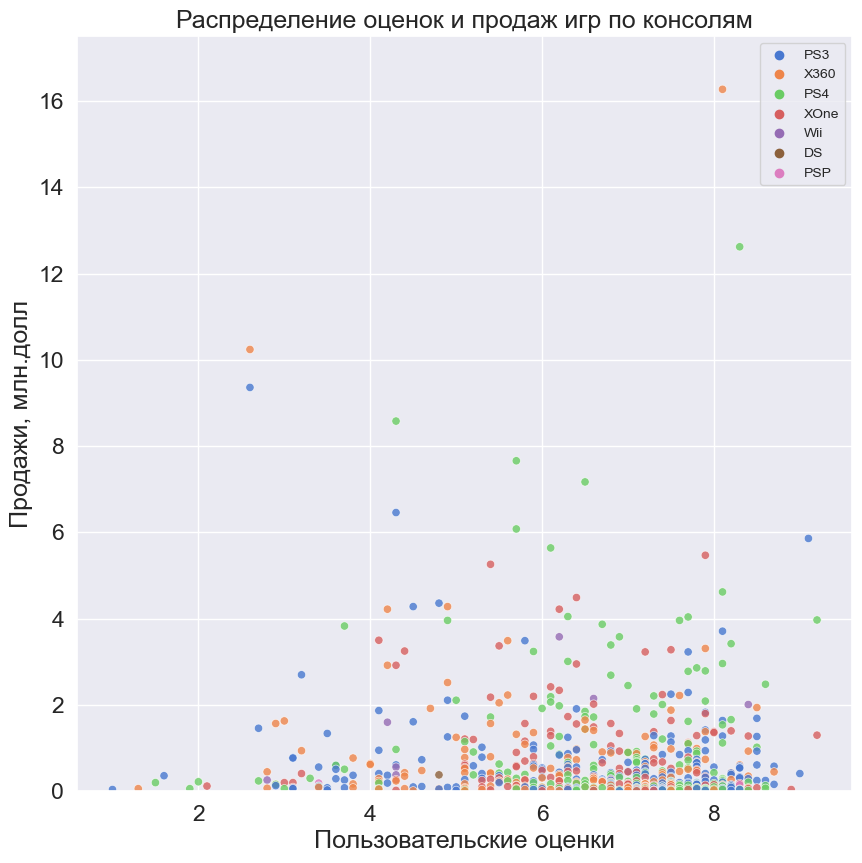

In [24]:
figure(figsize=(10,10),dpi=100)
chart=(sns.scatterplot(x='user_score',
                       y='total_sales',
                       data=data_games_actual,
                       hue='platform',
                       palette='muted',
                       legend='brief',
                       alpha=0.8,
                       marker='o'))
plt.xlabel("Пользовательские оценки")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение оценок и продаж игр по консолям")
plt.legend(loc=1,prop={'size': 10})
chart.grid(True)
chart.set(ylim=(0,17.5))
plt.show()

Схожее распределение оценок как и у X360.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

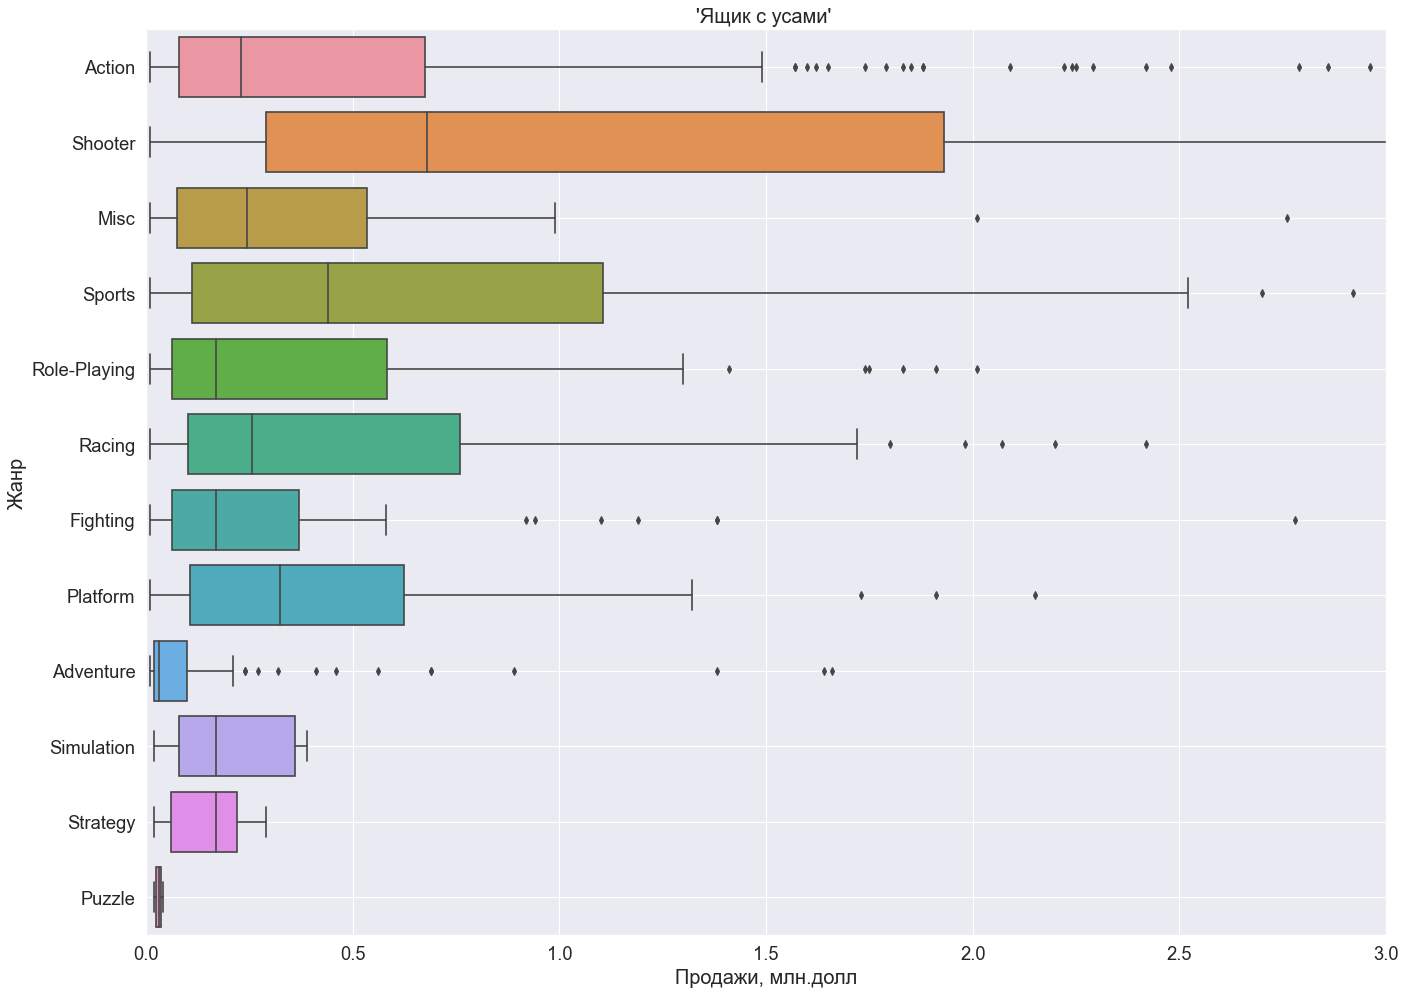

In [25]:
figure(figsize=(20,15),dpi=80)
sns.set(font_scale = 1.5)
chart=sns.boxplot(x=data_games_actual['total_sales'], 
             y=data_games_actual['genre'], 
             data=data_games_actual,orient='h')
chart.grid(True)
chart.set(xlim=(0,3))
plt.xlabel("Продажи, млн.долл")
plt.ylabel("Жанр")
plt.title("'Ящик с усами' ")
plt.show()

 У шутеров самые высокие продажи. Чаще всего они приносят доход до 2.5 млн.долл с медианой в 0.4 млн.долл.
Следом идут Fighting, Action, Racing и Sports. Их  прибыль  меньше, 1.3-1.4 млн.долл, медиана - 0.2 млн.долл.
Самые низкие продажи у Puzzle и Adventure, из большая часть продаж игры доходит до 0.4 илн.долл, а медиана - 0.1 млн.долл.

## 4 Портрет пользователя каждого региона

#### 4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж

Для составления портрета пользователе возьмем топ-6 самых популярных консолей



In [26]:
data_games_6=data_games_actual[data_games_actual['platform'].isin(['PS2','XOne' , 'X360', 'PS3', 'Wii', 'PS4'])]
data_games_6.pivot_table(index = 'platform' , values = ['na_sales','eu_sales','jp_sales','other_sales'], aggfunc = "sum")

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS3,66.55,22.05,62.83,26.40
PS4,109.31,10.22,87.25,38.11
Wii,5.82,0.05,6.50,1.11
X360,41.81,0.51,80.97,11.99
XOne,41.96,0.33,78.85,12.03


Для PS идет смещение объемов продаж с Северной Америке в сторону Европы.
Для  консолей семейства Х такого не происходим. Основной объем продаж остается в Северной Америке

#### Самые популярные жанры (топ-5). Поясните разницу.

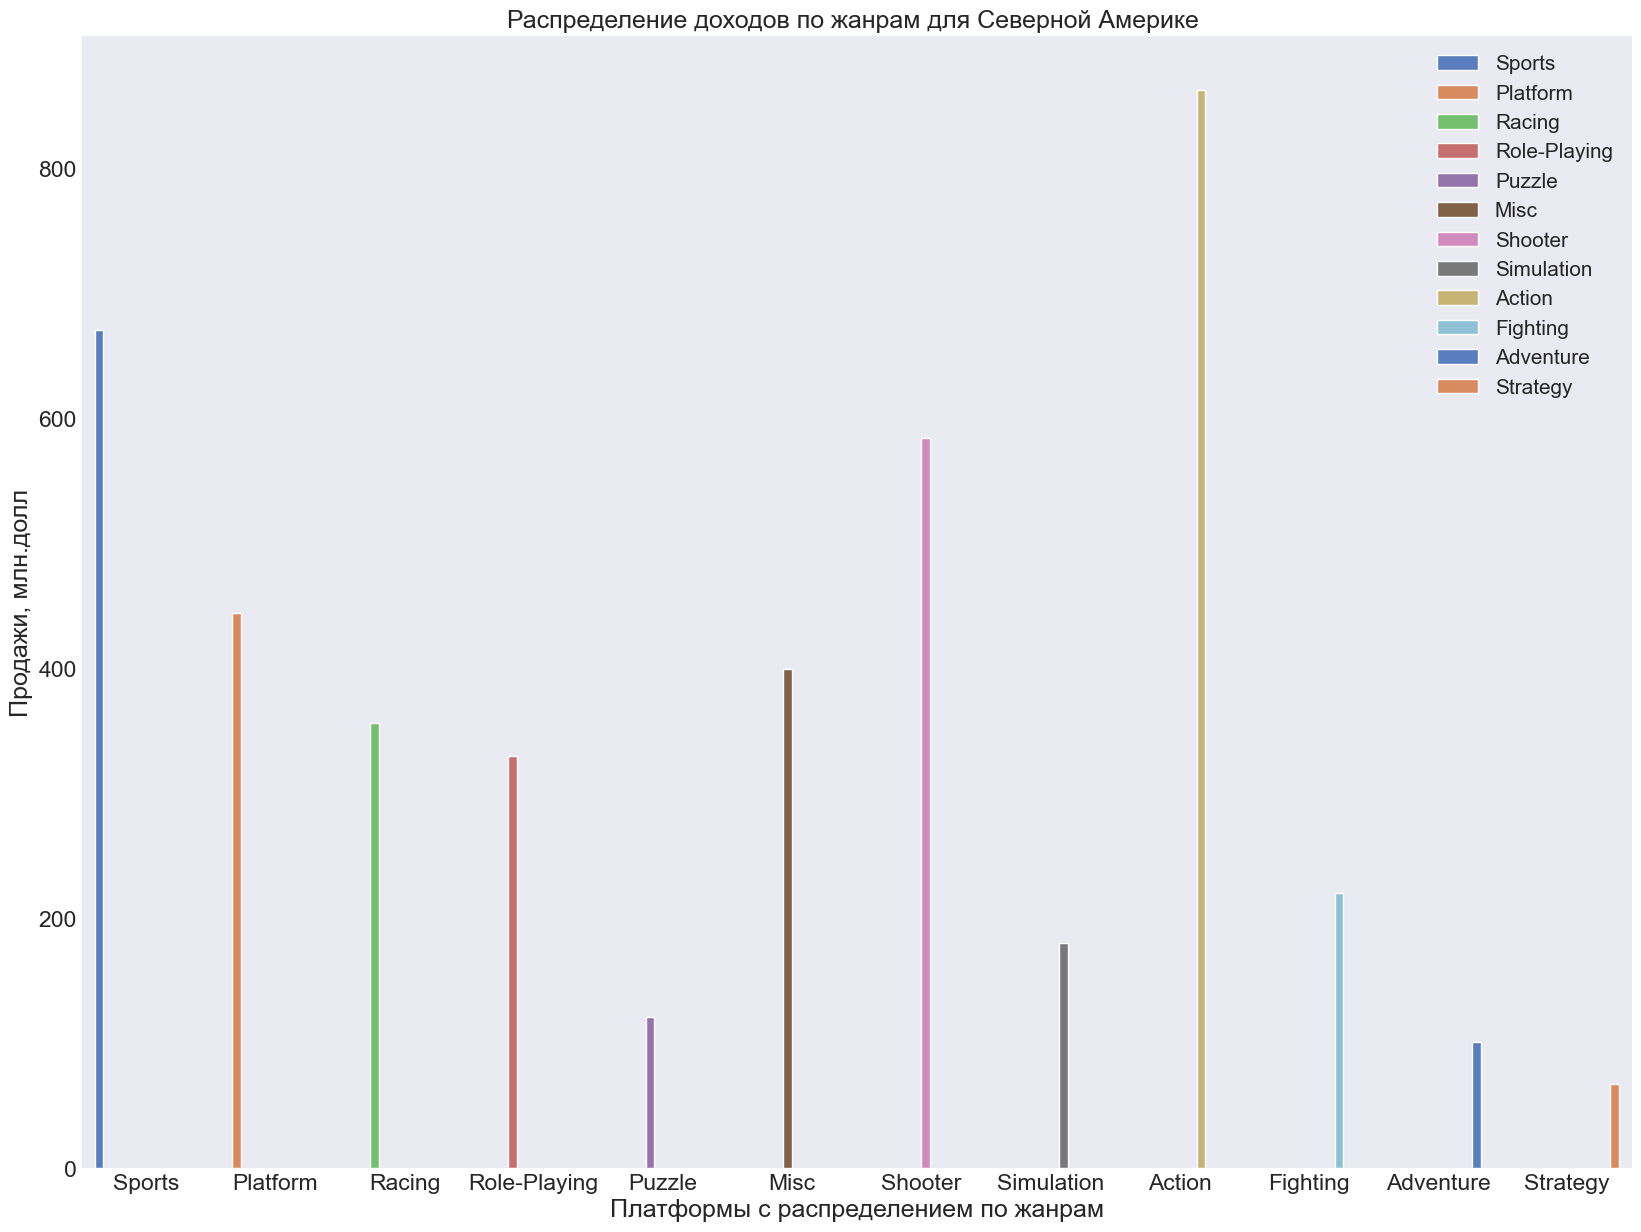

In [41]:
figure(figsize=(20,15),dpi=100)
plt.style.use('seaborn-dark')
(sns.barplot(x='genre', 
             y='na_sales', 
             hue='genre',
             data=data_games,
             ci=None,orient='v',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Платформы с распределением по жанрам")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение доходов по жанрам для Северной Америке ")
plt.show()

Топ - 5 Жанров для Северной Америке: Аction ,Sports, Shooter, Platform , Misc

###Когда мир консолей был однополярен:(времена PS2) пользователи предпочитали жанры Action и Sports. 
С выходом Wii любители жанра Sports предпочли именно эту консоль.
Между XBOX И PS (как между прямыми конкурентами) самые полпулярные жанры стали Shooter и Action. Sports остался на почетном третьем месте.

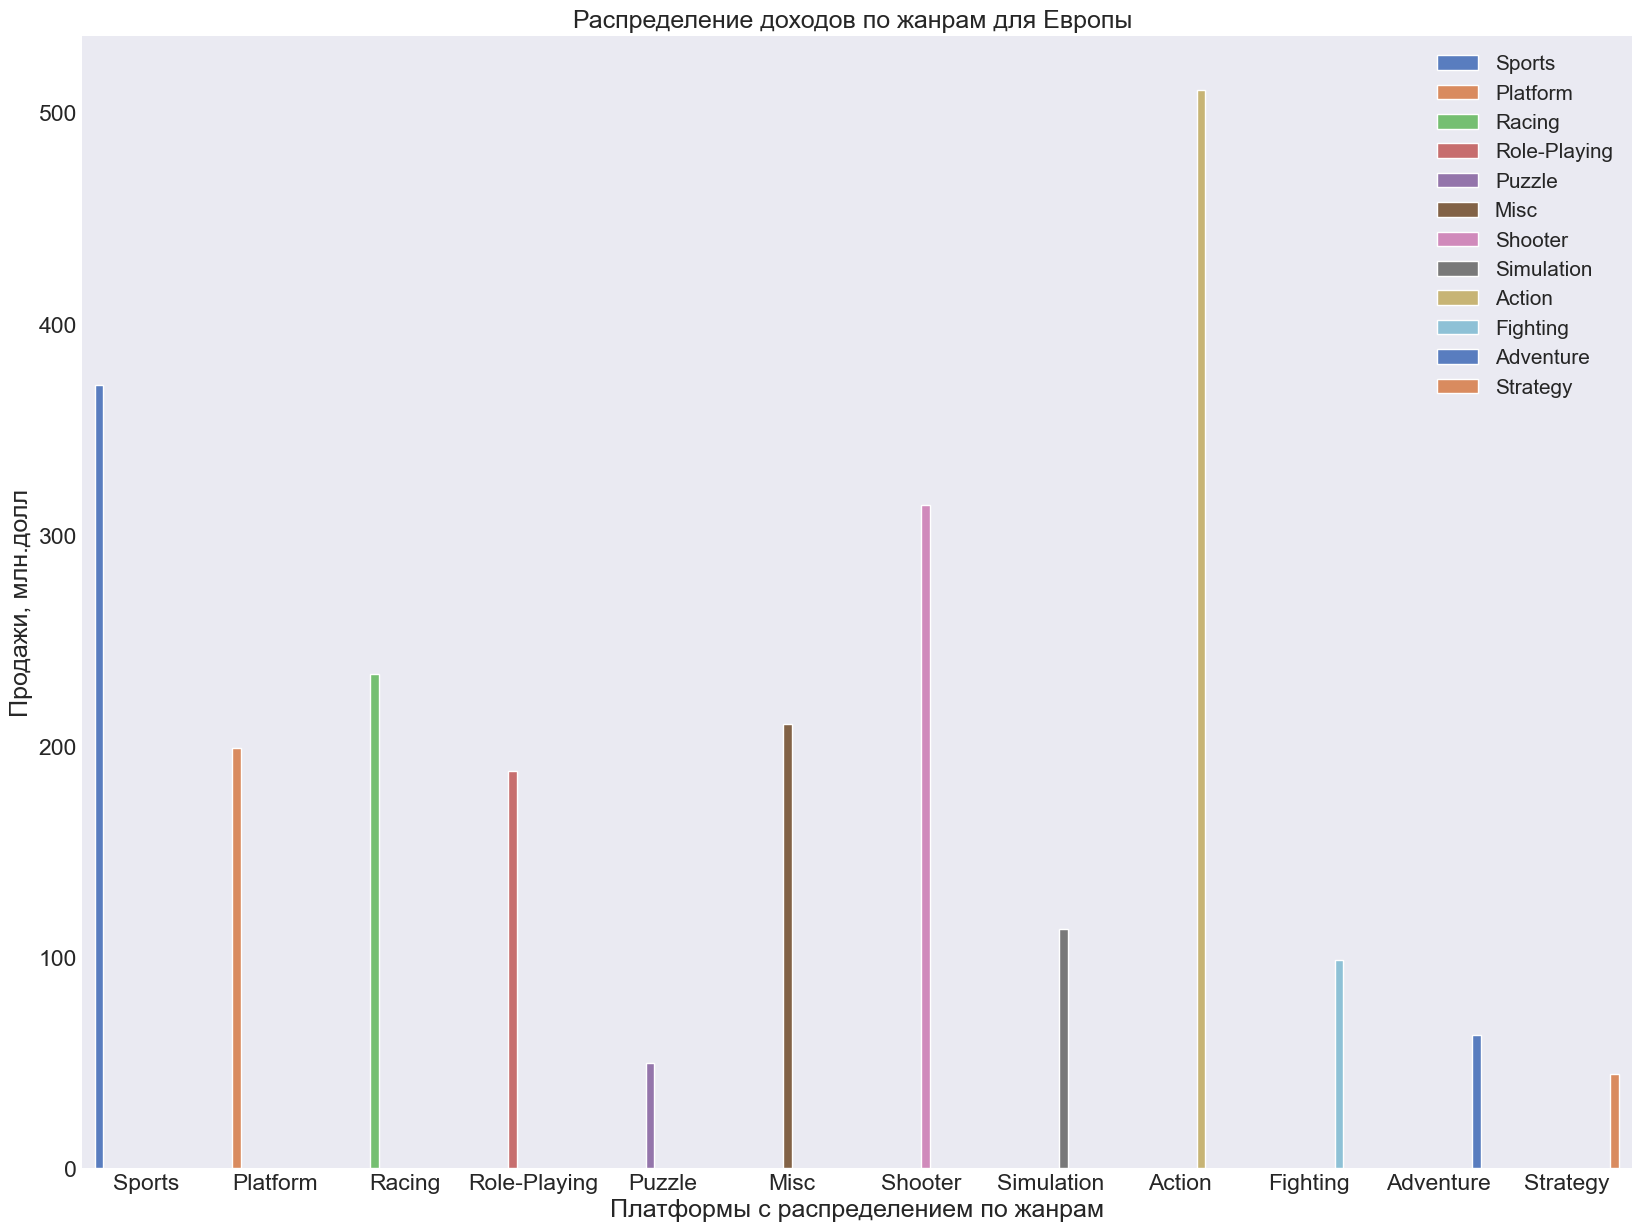

In [38]:
figure(figsize=(20,15),dpi=100)
plt.style.use('seaborn-dark')
(sns.barplot(x='genre', 
             y='eu_sales', 
             hue='genre',
             data=data_games,
             ci=None,orient='v',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Платформы с распределением по жанрам")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение доходов по жанрам для Европы ")
plt.show()

Топ - 5 Жанров для Европы : Аction ,Sports, Shooter, Racing, Platform 

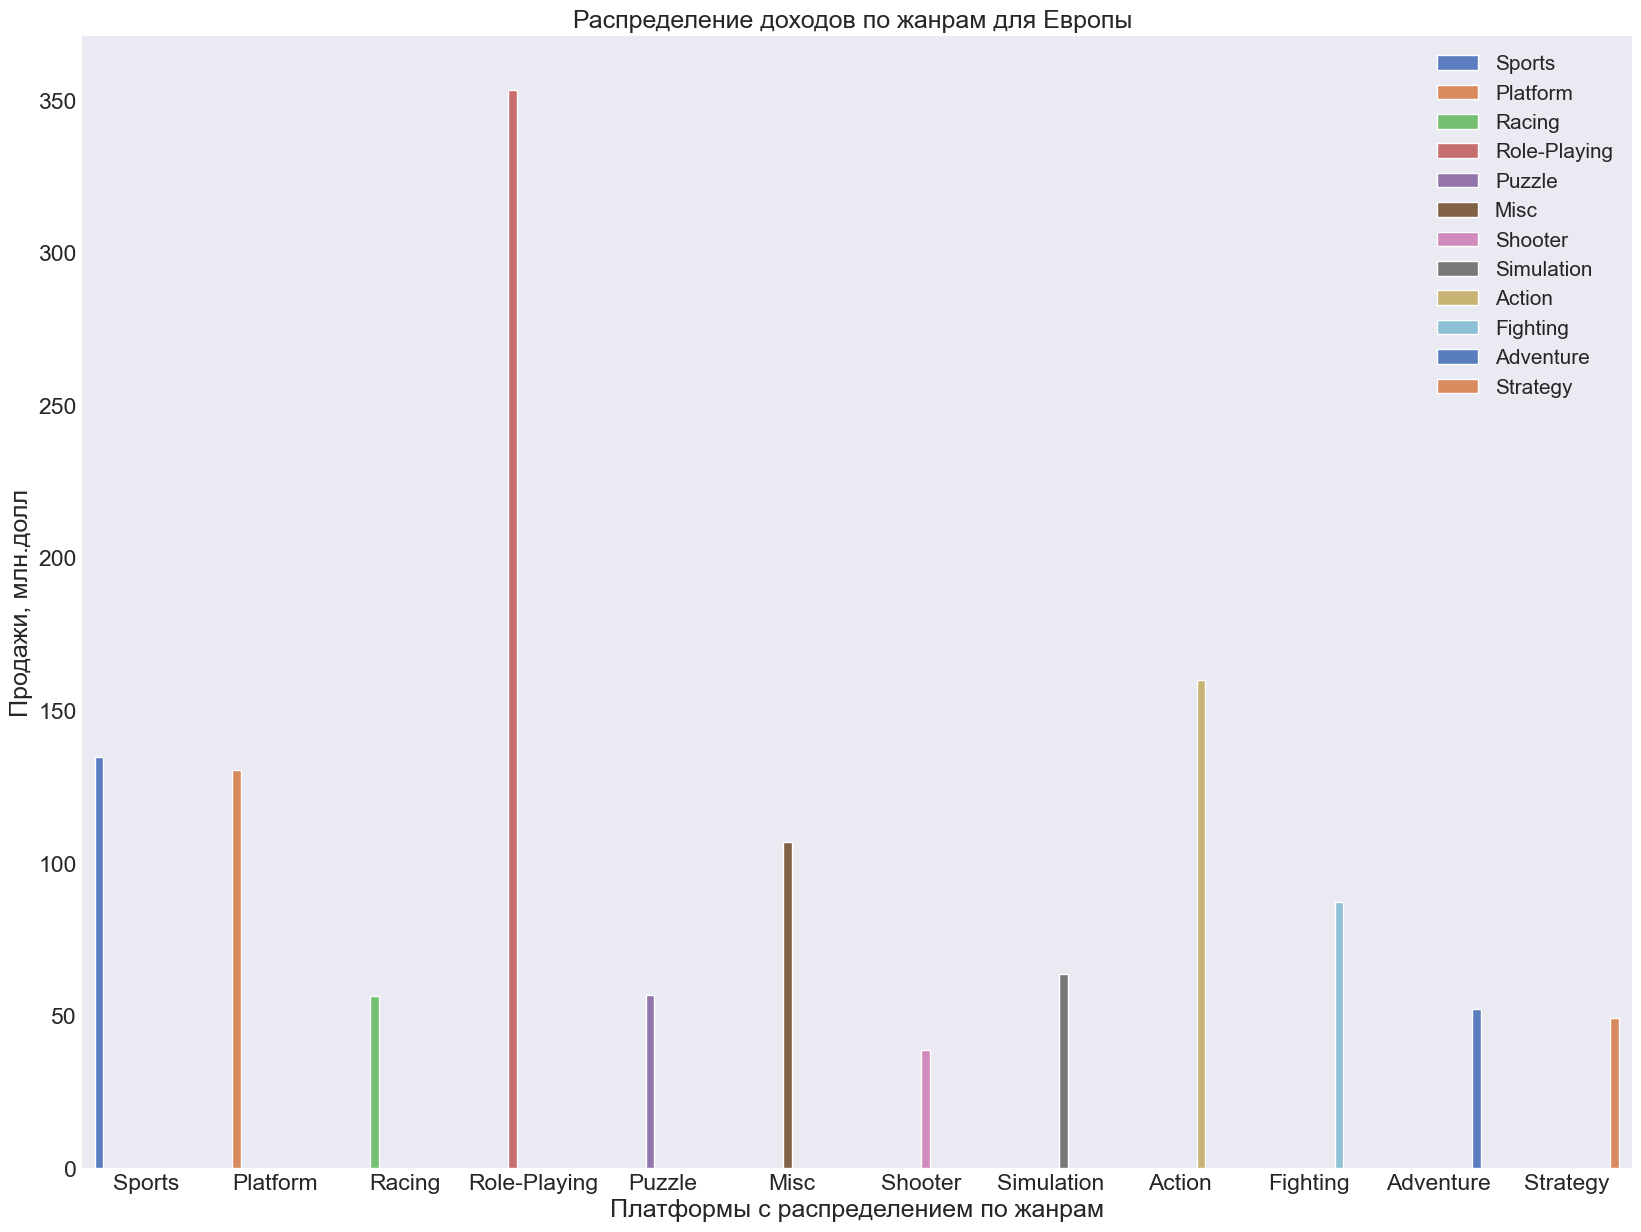

In [39]:
figure(figsize=(20,15),dpi=100)
plt.style.use('seaborn-dark')
(sns.barplot(x='genre', 
             y='jp_sales', 
             hue='genre',
             data=data_games,
             ci=None,orient='v',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Платформы с распределением по жанрам")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение доходов по жанрам для Японии ")
plt.show()

Топ - 5 Жанров для Японии : Role-Playing ,Action, Sports,  Platform , Misc

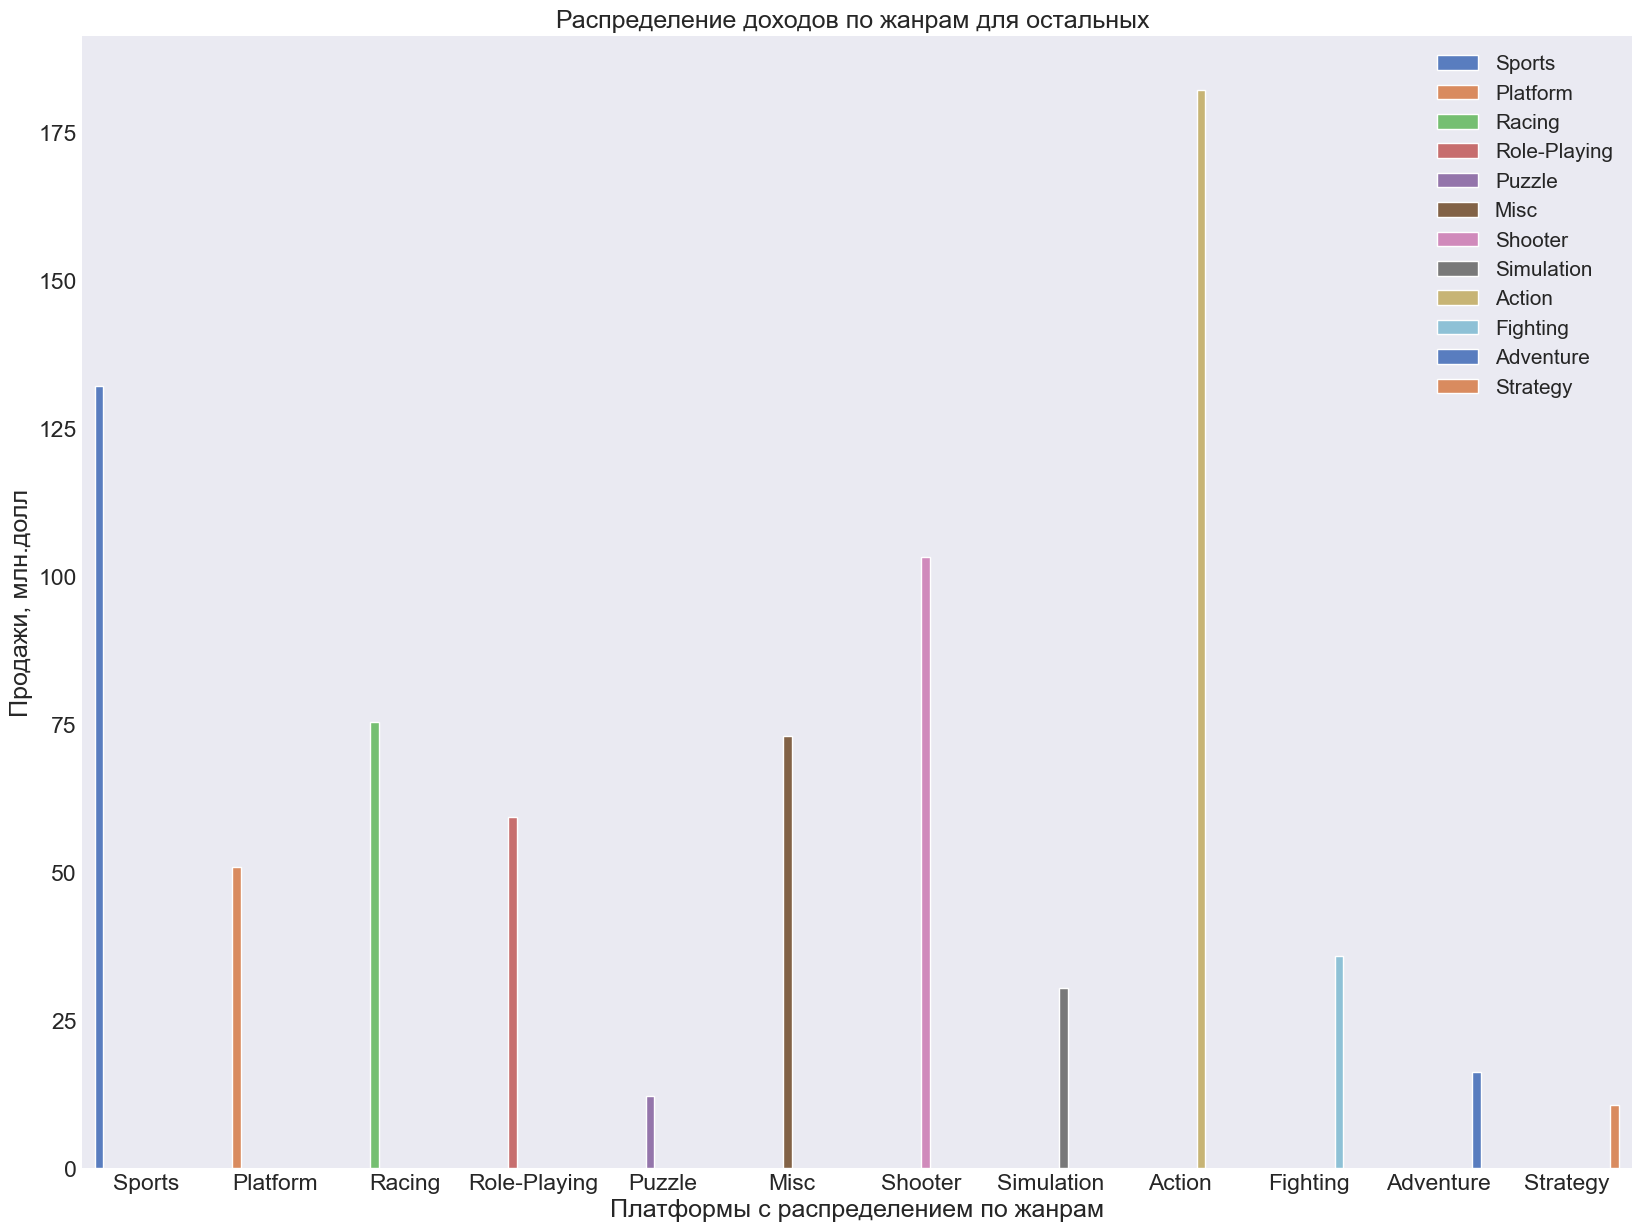

In [42]:
figure(figsize=(20,15),dpi=100)
plt.style.use('seaborn-dark')
(sns.barplot(x='genre', 
             y='other_sales', 
             hue='genre',
             data=data_games,
             ci=None,orient='v',
             dodge=True,estimator = sum,
             palette="muted"))
plt.legend(loc=1,prop={'size': 15})
plt.xlabel("Платформы с распределением по жанрам")
plt.ylabel("Продажи, млн.долл")
plt.title("Распределение доходов по жанрам для остальных ")
plt.show()

Топ - 5 Жанров для остальных стран :  Action, Sports, Shooter, Racing, Misc 

Во всем мире, за исключением Японии топ 3 выглядит одинаково. 
В Японии самым популярным жанром являются ролевые игры.Видимо связано с традиционными устоями общества. И с нехваткой общения в реальной жизни

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расшифорка рейтинга 

'K-A'='E'=Все, 

'AO'=Взрослые18+

'M'=17+, 

'T'=страше 13+, 

'E10+'=10+ , 

'EC'=дети

In [28]:
data_games_top.pivot_table( index = "rating", values =['na_sales','eu_sales','jp_sales','other_sales'], aggfunc = (['mean', 'median'])) 

mean                                   median                    \
        eu_sales  jp_sales  na_sales other_sales eu_sales jp_sales na_sales   
rating                                                                        
AO      0.610000  0.000000  1.260000    0.090000     0.61     0.00     1.26   
E       0.179667  0.046446  0.334550    0.060784     0.03     0.00     0.13   
E10+    0.135328  0.027728  0.270017    0.056426     0.03     0.00     0.13   
EC      0.018333  0.000000  0.240000    0.018333     0.00     0.00     0.23   
K-A     0.160000  1.460000  0.260000    0.030000     0.16     1.46     0.26   
M       0.352814  0.048532  0.577537    0.135759     0.11     0.00     0.19   
T       0.147673  0.054481  0.283479    0.057309     0.04     0.00     0.12   

                    
       other_sales  
rating              
AO            0.09  
E             0.01  
E10+          0.02  
EC            0.02  
K-A           0.03  
M             0.04  
T             0.02

Самые прибыльные игры c рейтингом 18+ , далее 17+ ,

Далее примерно равные доли распределения для возрастных ограничений.

## 5 Проверка Гипотез

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулирем гипотезы

Н0 - средние пользовательские рейтинги платформ  Xbox One и PC равны
Н1 - средние пользовательские рейтинги различны

In [29]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу,
user_score_xone=data_games.query('platform=="XOne"')['user_score'].dropna()
user_score_pc=data_games.query('platform=="PC"')['user_score'].dropna()                    

results = st.ttest_ind(user_score_xone, user_score_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулирем гипотезы

Н0 - средние пользовательские рейтинги Аction и Sports различны 
Н1 - средние пользовательские рейтинги этих жанров  одинаковы

In [30]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу,
user_score_action=data_games.query('genre=="Action"')['user_score'].dropna()
user_score_sports=data_games.query('genre=="Sports"')['user_score'].dropna()
print(user_score_action.mean())
print(user_score_sports.mean())

results = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

7.058129175946543
6.951433857539316
p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

Мы провели анализ и предобработку данных 
   - заменили названия
   - переменные
   - пропущенные значения оставили без изменений , так как они случайны и не коррелируются ни с одной другой величиной

Провели исследовательский анализ, выделили актуальный период игр с 2005 года и выделили топ 6 платформ ('PS2','XOne','X360', 'PS3','Wii','PS4')

Проанализировали распределение выручки по жанрам, зависимость ее от оценок критиков и пользователей.

Проанализировали платформы по регионам

Проверили гипотезы.

В обощении , самыми перспективными являются платформы PS4 и XONE , так как продажиь на эти консоли растут и они довольно свежие по выходу.
Самыми прибльными жанрами для эти консолей яаляются Action и Shooter. Большая часть продаж приходятся на Европу и Северную Америку.

В зависимости от возрастонго рейтинга лидерами являются игры 18+ и 17+ 

Гипотезы:
 - средние пользовательские рейтинги платформ  Xbox One и PC равны - опровергнута
 - средние пользовательские рейтинги Аction и Sports различны - не получилось опровергнуть
 
 Лучший продукт - Шутер для PS4/XONE с возрастным ограничением 18+. С основным рынком сбыта в Северную Америку и Европу
 
 